In [2]:
import sys, os
sys.path.extend([os.path.expanduser('..')])
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set_style("white")
from helpers import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

#rcParams['pdf.fonttype'] = 42
#rcParams['ps.fonttype'] = 42

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [67]:
# Load data 
n_tasks = 6
# all_evals  = utils.load_zipped_pickle("data_path_int[omega_decay=sum,xi=0.1]_optadam_lr1.00e-03_bs256_ep20_tsks10.pkl.gz")

In [68]:
# keys = list(all_evals.keys())
# sorted_keys = np.sort(keys)
# print(sorted_keys)

In [69]:
sns.set_context("paper")
sns.set_style('ticks')

In [70]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [71]:
def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [72]:
# def plot_data():
#     marker = iter(['o', 's', 's', 'd', 'o'])
#     plot_kwargs = dict(alpha=0.9)
      
#     for cval in sorted_keys:
#         stuff = []
#         for i in range(6):#len(all_evals[cval])):#n_tasks):
#             stuff.append(all_evals[cval][i][:i+1].mean())
#         plot(range(1,n_tasks+1), stuff, '%s-'%next(marker), label="Test (c=%g)"%cval, zorder=2, **plot_kwargs)

No handles with labels found to put in legend.


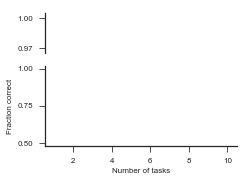

In [73]:
fig = plt.figure(figsize=(3.3,2.4))
gs = GridSpec(2, 1, height_ratios=[0.5, 1])
ax = plt.subplot(gs[0])
plot_data()

# Training error for control network -- trained conventionally
# plt.arrow(10.5, 0.995198, -0.2, 0, head_width=0.005, head_length=0.2, fc='k', ec='k')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='on')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# ax.get_yaxis().tick_left()
plt.ylim([0.965, 1.005])
plt.yticks([0.97, 1.0])
plt.xlim([0.5, 10.46])

ax2 = plt.subplot(gs[1])
plot_data()

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([0.48, 1.02])
plt.xlim([0.5, 10.5])
simple_axis(ax2)
plt.yticks([0.5, 0.75, 1.0])



plt.legend(loc='lower left', fontsize=6)

plt.subplots_adjust(left=.18, bottom=.20, right=.99, top=.97)
plt.savefig("accuracy_vs_nbtasks.pdf", pad_inches=0)

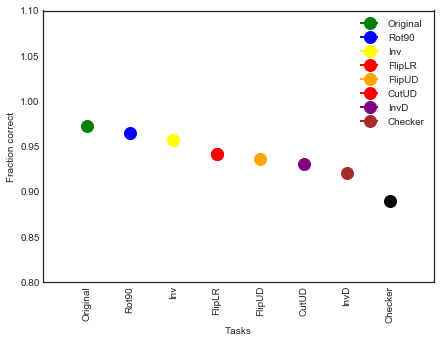

In [130]:
# train on tasks 1...7 each first, 5 epoch

acc_0 = [0.9729] 
acc_1 = [0.9644] 
acc_2 = [0.9566] 
acc_3 = [0.9356] 
acc_4 = [0.9419] 
acc_5 = [0.9305] 
acc_6 = [0.9206] 
acc_7 = [0.8895] 

x_org = np.arange(1, 1.5, 1)
x_2 =  np.arange(2, 2.5, 1)
x_3 =  np.arange(3, 3.5, 1)
x_5 =  np.arange(4, 4.5, 1)
x_4 =  np.arange(5, 5.5, 1)
x_6 =  np.arange(6, 6.5, 1)
x_7 = np.arange(7, 7.5, 1)
x_8 = np.arange(8, 8.5, 1)

fig = plt.figure(figsize=(7,5))

plt.xlabel('Tasks')
plt.ylabel('Fraction correct')
labels = ['Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker']
plt.xticks(x, labels, rotation='vertical')
plt.ylim([.8, 1.1])
plt.xlim([0, 9])



#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_2, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_5, acc_4, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red
plt.plot(x_4, acc_3, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_4, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red
plt.plot(x_6, acc_5, color='purple', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # cutud = purple
plt.plot(x_7, acc_6, color='brown', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # invbot = brown
plt.plot(x_8, acc_7, color='black', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # check = black

plt.gca().legend(('Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker'))
plt.savefig("benchmarks7.png", pad_inches=0)

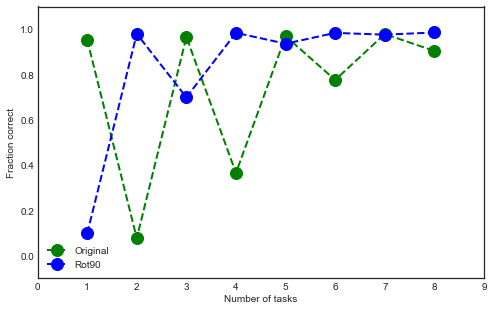

In [131]:
# train on 2 tasks, 4 iter: 0,1,0,1,0,1,0,1

acc_0 = [0.9528,0.0772,0.9651,0.3653,0.9689,0.7758,0.9784,0.9037] # original = green
acc_1 = [0.0978,0.9794,0.699,0.9838,0.9358,0.9835,0.9756,0.9854] # rot90 = blue

fig = plt.figure(figsize=(8,5))

x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 9])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc_0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc_1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'Rot90'))
plt.savefig("graph.png", pad_inches=0)

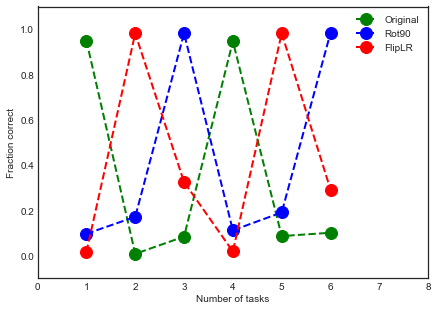

In [132]:
# train on 3 tasks, 2 iter: 0,2,1,0,2,1

# accuracy for 0
acc0 = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012] # original = green
acc1 = [0.0965,0.1715,0.9815,0.1117,0.1908,0.9836] # rot90 = blue
acc2 = [0.0164,0.9812,0.3251,0.0185,0.9819,0.2915] # fliplr = red

fig = plt.figure(figsize=(7,5))

x = np.arange(1, 6.5, 1)
#y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 8])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc2, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'Rot90', 'FlipLR'))
plt.savefig("graph1.png", pad_inches=0)

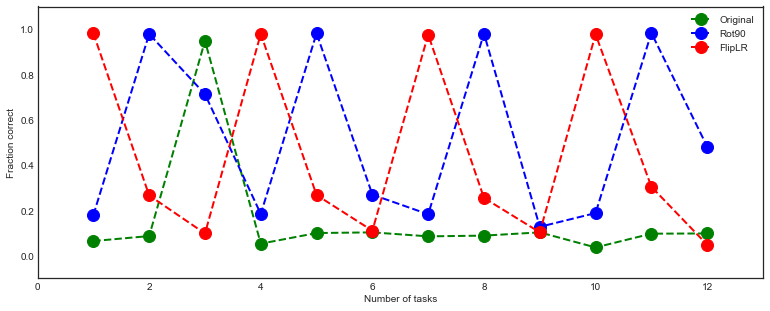

In [133]:
# train on 3 tasks, 4 iter: 2,1,0,2,1,0,2,1,0,2,1,0
# fliplr, rot90, original

acc0b = [0.0645,0.0865,0.9483,0.0529,0.0998 ,0.1028 ,0.0852, 0.0884, 0.1028,0.0362, 0.097, 0.098] # original = green
acc1b = [0.1795,0.9786,0.7128,0.1841,0.9815, 0.2694,0.1828,0.9805, 0.1273, 0.188,0.9833, 0.4814] # rot90 = blue
acc2b = [0.9817,0.2658,0.0979,0.9791,0.2674, 0.1102,0.9758,0.2547, 0.103, 0.9773, 0.3041, 0.0481] # fliplr = red

fig = plt.figure(figsize=(13,5))

x = np.arange(1, 12.5, 1)
#y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 13])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc0b, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc1b, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc2b, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'Rot90',  'FlipLR'))
plt.savefig("graph1b.png", pad_inches=0)

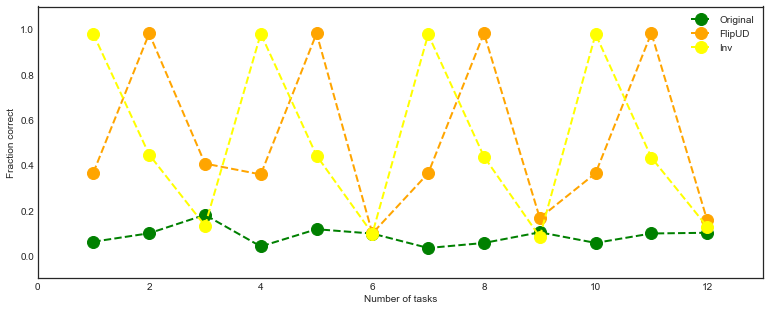

In [134]:
# train on 3 tasks, 4 iter: 2,1,0,2,1,0,2,1,0,2,1,0
# inv, flipud, original

acc0b = [0.0615, 0.0988, 0.1801, 0.0407, 0.1167, 0.0974, 0.0338, 0.056, 0.1032, 0.0562, 0.0979, 0.101] # original = green
acc1b = [0.3668, 0.9809, 0.4066, 0.3585, 0.9813, 0.0983, 0.3636, 0.9818, 0.1663, 0.3639, 0.9826, 0.1564] # flipud = orange
acc2b = [0.9783, 0.446, 0.1323, 0.9798, 0.4418, 0.0974, 0.9769, 0.4373, 0.0833, 0.9782, 0.4331, 0.1277] # inv = yellow

fig = plt.figure(figsize=(13,5))

x = np.arange(1, 12.5, 1)
#y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 13])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc0b, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc1b, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc2b, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'FlipUD', 'Inv'))
plt.savefig("graph1c.png", pad_inches=0)

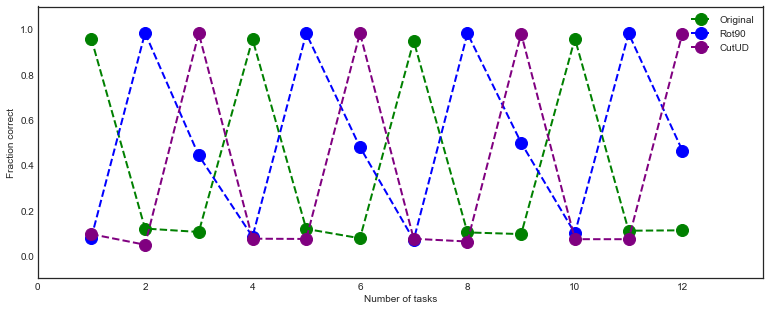

In [135]:
# train on 3 tasks, 4 iter: 0,1,2,0,1,2,0,1,2,0,1,2
# original, rot90, cutud

acc0b = [0.9579,0.1197,0.1045,0.9558,0.118,0.0768, 0.9477, 0.1026, 0.0952, 0.9581, 0.1101, 0.1118] # original = green
acc1b = [0.0788,0.9831,0.4423,0.0835,0.9808,0.4792, 0.0696, 0.9812, 0.498, 0.0988, 0.9808, 0.4637] # rot90 = blue
acc2b = [0.095,0.0481,0.9815,0.0749,0.0737,0.9819, 0.0745, 0.0624, 0.9795,0.0727, 0.0726, 0.9806] # cutud = purple

fig = plt.figure(figsize=(13,5))

x = np.arange(1, 12.5, 1)
#y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 13.5])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc0b, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc1b, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc2b, color='purple', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'Rot90', 'CutUD'))
plt.savefig("graph1d.png", pad_inches=0)

In [136]:
# acc0b = [0.0645,0.0865,0.9483] # original = green
# acc1b = [0.9586,0.712] # rot90 = blue
# acc2b = [0.7128] # fliplr = red

# fig = plt.figure(figsize=(7,5))

# x0 = np.arange(1, 3.5, 1)
# x1 = np.arange(2, 3.5, 1)
# x2 = np.arange(3, 3.5, 1)
# #y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

# plt.xlabel('Number of tasks')
# plt.ylabel('Fraction correct')
# plt.ylim([-.1, 1.1])
# plt.xlim([0, 4])

# #plt.plot(x, y, 'bo') 
# plt.plot(x0, acc0b, color='green', marker='o', linestyle='dashed',
#         linewidth=2, markersize=12)
# plt.plot(x1, acc1b, color='blue', marker='o', linestyle='dashed',
#         linewidth=2, markersize=12)
# plt.plot(x2, acc2b, color='red', marker='o', linestyle='dashed',
#         linewidth=2, markersize=12)
# plt.savefig("graph1b.png", pad_inches=0)

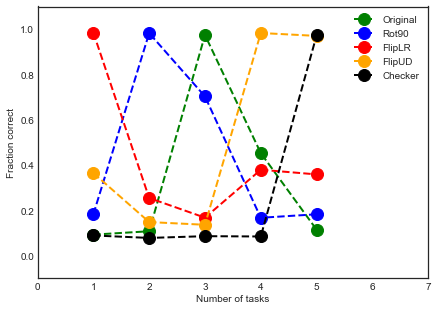

In [139]:
# with allie's soln
# train on 5 tasks, 1 iter: 2,1,0

acc0b = [0.0928,0.1077, 0.9742,0.4527,0.1149] # original = green
acc1b = [0.1828,0.9825,0.703,0.1672,0.1827] # rot90 = blue
acc2b = [0.9842,0.2545,0.1677,0.3793,0.3587] # fliplr = red
acc3b = [0.3646,0.1483,0.1363,0.983,0.9702] # flipup = orange
acc4b = [0.0892,0.0782,0.086,0.0846,0.9723] #checkerboard = black

# acc0b = [0.9742,0.4527,0.1149] # original = green
# acc1b = [0.9825,0.703,0.1672,0.1827] # rot90 = blue
# acc2b = [0.9842,0.2545,0.1677,0.3793,0.3587] # fliplr = red
# acc3b = [0.983,0.9702] # flipup = orange
# acc4b = [0.9723] #checkerboard = black

# x0= np.arange(3, 5.5, 1)
# x1= np.arange(2, 5.5, 1)
# x2= np.arange(1, 5.5, 1)
# x3= np.arange(4, 5.5, 1)
# x4= np.arange(5, 5.5, 1)


fig = plt.figure(figsize=(7,5))

x = np.arange(1, 5.5, 1)
#y = [0.9496,0.008,0.0841,0.9466,0.0863,0.1012]

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 7])

#plt.plot(x, y, 'bo') 
plt.plot(x, acc0b, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc1b, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc2b, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc3b, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.plot(x, acc4b, color='black', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

plt.gca().legend(('Original', 'Rot90',  'FlipLR', 'FlipUD', 'Checker'))
plt.savefig("graph_soln_all.png", pad_inches=0)

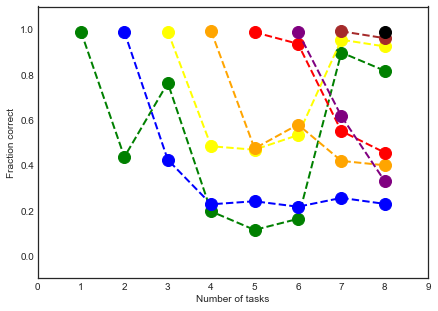

In [43]:

acc_org = [0.9888, 0.4359, 0.7626, 0.1953, 0.1136, 0.1624, 0.8969, 0.8162] 
acc_2 = [0.9877, 0.4234, 0.2267, 0.2402, 0.216, 0.255, 0.2285] 
acc_3 = [0.9896, 0.483, 0.4677, 0.5322, 0.9533, 0.9238] 
acc_4 = [0.9906, 0.4731, 0.5787, 0.4183, 0.399] 
acc_5 = [0.9864, 0.9354, 0.55, 0.4548] 
acc_6 = [0.9876, 0.6159, 0.3286] 
acc_7 = [0.9906, 0.9601] 
acc_8 = [0.9886] 

x_org = np.arange(1, 8.5, 1)
x_2 =  np.arange(2, 8.5, 1)
x_3 =  np.arange(3, 8.5, 1)
x_4 =  np.arange(4, 8.5, 1)
x_5 =  np.arange(5, 8.5, 1)
x_6 =  np.arange(6, 8.5, 1)
x_7 = np.arange(7, 8.5, 1)
x_8 = np.arange(8, 8.5, 1)

fig = plt.figure(figsize=(7,5))

#x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 9])

#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_org, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_2, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_3, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_4, acc_4, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_5, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red
plt.plot(x_6, acc_6, color='purple', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # cutud = purple
plt.plot(x_7, acc_7, color='brown', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # invbot = brown
plt.plot(x_8, acc_8, color='black', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # check = black
# check
plt.savefig("graph_presentation.png", pad_inches=0)

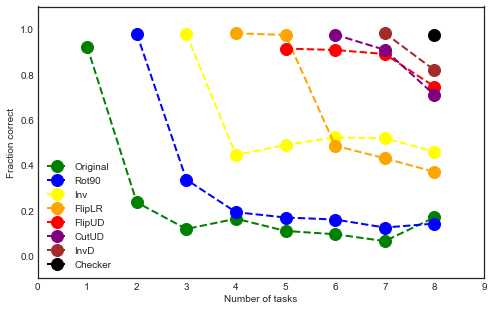

In [137]:
acc_org = [0.9221, 0.2351, 0.1178,0.1631,0.109,0.0946,0.0641,0.1685] 
acc_2 = [0.98, 0.3358,0.1919,0.1684,0.1595,0.1241,0.1415] 
acc_3 = [0.9782,0.4445,0.4884,0.5223,0.5182,0.4592] 
acc_4 = [0.9816,0.9745,0.4856,0.4298,0.37] 
acc_5 = [0.9143,0.908,0.8903,0.7466] 
acc_6 = [0.976,0.9086,0.7098] 
acc_7 = [0.9826,0.8192] 
acc_8 = [0.9732] 

x_org = np.arange(1, 8.5, 1)
x_2 =  np.arange(2, 8.5, 1)
x_3 =  np.arange(3, 8.5, 1)
x_4 =  np.arange(4, 8.5, 1)
x_5 =  np.arange(5, 8.5, 1)
x_6 =  np.arange(6, 8.5, 1)
x_7 = np.arange(7, 8.5, 1)
x_8 = np.arange(8, 8.5, 1)

fig = plt.figure(figsize=(8,5))

#x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 9])

#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_org, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_2, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_3, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_4, acc_4, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_5, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red
plt.plot(x_6, acc_6, color='purple', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # cutud = purple
plt.plot(x_7, acc_7, color='brown', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # invbot = brown
plt.plot(x_8, acc_8, color='black', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # check = black
# check

plt.gca().legend(('Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker'))
plt.savefig("graph_presentation.png", pad_inches=0)

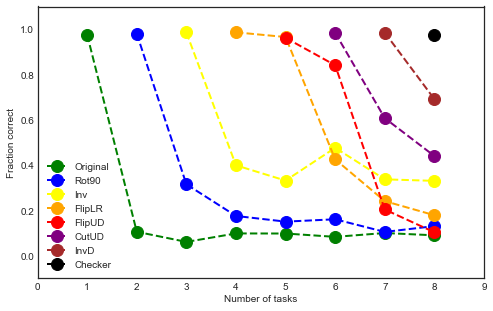

In [138]:
# train on tasks 1...7 once, with solution, strength 0

# acc_0 = [0.975,0.1054,0.0607,0.0981,0.0977,0.083,0.0999,0.0898] 
# acc_1 = [0.1229,0.9795,0.3151,0.1752,0.1502,0.1606,0.1047,0.1304] 
# acc_2 = [0.0116,0.1702,0.9853,0.3988,0.3314,0.4761,0.3369,0.3302] 
# acc_3 = [0.0542,0.1408,0.3523,0.986,0.9652,0.4251,0.2407,0.1785] 
# acc_4 = [0.102,0.1048,0.0974,0.0897,0.9616,0.8406,0.2038,0.1032] 
# acc_5 = [0.0444,0.1298,0.4377,0.3949,0.3906,0.9838,0.607,0.4399] 
# acc_6 = [0.0985,0.0651,0.1286,0.0887,0.0731,0.1362,0.9845,0.6911] 
# acc_7 = [0.147,0.1213,0.1073,0.0498,0.0633,0.1667,0.1024,0.9752] 

acc_0 = [0.975,0.1054,0.0607,0.0981,0.0977,0.083,0.0999,0.0898] 
acc_1 = [0.9795,0.3151,0.1752,0.1502,0.1606,0.1047,0.1304] 
acc_2 = [0.9853,0.3988,0.3314,0.4761,0.3369,0.3302] 
acc_3 = [0.986,0.9652,0.4251,0.2407,0.1785] 
acc_4 = [0.9616,0.8406,0.2038,0.1032] 
acc_5 = [0.9838,0.607,0.4399] 
acc_6 = [0.9845,0.6911] 
acc_7 = [0.9752] 

# x_org = np.arange(1, 8.5, 1)
# x_2 =  np.arange(1, 8.5, 1)
# x_3 =  np.arange(1, 8.5, 1)
# x_4 =  np.arange(1, 8.5, 1)
# x_5 =  np.arange(1, 8.5, 1)
# x_6 =  np.arange(1, 8.5, 1)
# x_7 =  np.arange(1, 8.5, 1)
# x_8 =  np.arange(1, 8.5, 1)

x_org = np.arange(1, 8.5, 1)
x_2 =  np.arange(2, 8.5, 1)
x_3 =  np.arange(3, 8.5, 1)
x_4 =  np.arange(4, 8.5, 1)
x_5 =  np.arange(5, 8.5, 1)
x_6 =  np.arange(6, 8.5, 1)
x_7 = np.arange(7, 8.5, 1)
x_8 = np.arange(8, 8.5, 1)

fig = plt.figure(figsize=(8,5))

#x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 9])

#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_2, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_4, acc_3, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_4, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red
plt.plot(x_6, acc_5, color='purple', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # cutud = purple
plt.plot(x_7, acc_6, color='brown', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # invbot = brown
plt.plot(x_8, acc_7, color='black', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # check = black
# check
plt.gca().legend(('Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker'))
plt.savefig("graph_all7_soln_some.png", pad_inches=0)

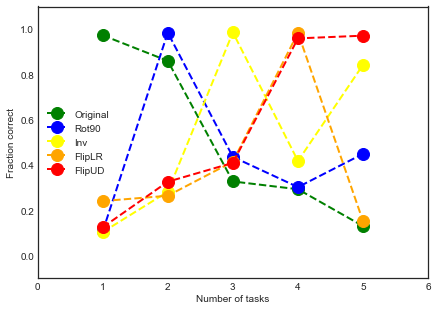

In [147]:
# allies! 0,1,2,3,4

acc_0 = [0.9729,0.86,0.3276,0.2932,0.1303] 
acc_1 = [0.1067,0.9845,0.436,0.3026,0.4496] 
acc_2 = [0.1039,0.2822,0.9858,0.4179,0.8428] 
acc_3 = [0.241,0.2645,0.4148,0.9842,0.1514] 
acc_4 = [0.125,0.3264,0.4097,0.9592,0.9712] 

# acc_0 = [0.9729,0.86,0.3276,0.2932,0.1303] 
# acc_1 = [0.9845,0.436,0.3026,0.4496] 
# acc_2 = [0.9858,0.4179,0.8428] 
# acc_3 = [0.9842,0.1514] 
# acc_4 = [0.9712] 


# x_org = np.arange(1, 5.5, 1)
# x_2 =  np.arange(2, 5.5, 1)
# x_3 =  np.arange(3, 5.5, 1)
# x_4 =  np.arange(4, 5.5, 1)
# x_5 =  np.arange(5, 5.5, 1)

x_org = np.arange(1, 5.5, 1)
x_2 =  np.arange(1, 5.5, 1)
x_3 =  np.arange(1, 5.5, 1)
x_4 =  np.arange(1, 5.5, 1)
x_5 =  np.arange(1, 5.5, 1)

fig = plt.figure(figsize=(7,5))

#x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 6])

#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_2, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_4, acc_3, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_4, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red

# check
plt.gca().legend(('Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker'))
plt.savefig("graph_0-4allie_soln.png", pad_inches=0)

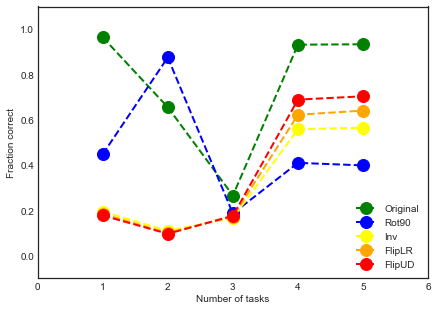

In [142]:
# their solution/dataset? 0,1,2,3,4

acc_0 = [0.9641002482823148,0.6553398058925318,0.2655226913928232,0.931474373366984,0.9331677578781603] 
acc_1 = [0.4476179724811942,0.875028223088644,0.18615940393033428,0.4096861594375732,0.39850982165708043] 
acc_2 = [0.1945,0.109,0.1665,0.558,0.565] 
acc_3 = [0.184,0.1,0.1725,0.622,0.6405] 
acc_4 = [0.1775,0.0965,0.176,0.689,0.7035] 
    
# acc_0 = [0.9641002482823148,0.6553398058925318,0.2655226913928232,0.931474373366984,0.9331677578781603] 
# acc_1 = [0.875028223088644,0.18615940393033428,0.4096861594375732,0.39850982165708043] 
# acc_2 = [0.1665,0.558,0.565] 
# acc_3 = [0.622,0.6405] 
# acc_4 = [0.7035] 

x_org = np.arange(1, 5.5, 1)
x_2 =  np.arange(1, 5.5, 1)
x_3 =  np.arange(1, 5.5, 1)
x_4 =  np.arange(1, 5.5, 1)
x_5 =  np.arange(1, 5.5, 1)

# x_org = np.arange(1, 5.5, 1)
# x_2 =  np.arange(2, 5.5, 1)
# x_3 =  np.arange(3, 5.5, 1)
# x_4 =  np.arange(4, 5.5, 1)
# x_5 =  np.arange(5, 5.5, 1)


fig = plt.figure(figsize=(7,5))

#x = np.arange(1, 8.5, 1)

plt.xlabel('Number of tasks')
plt.ylabel('Fraction correct')
plt.ylim([-.1, 1.1])
plt.xlim([0, 6])

#plt.plot(x, y, 'bo') 
plt.plot(x_org, acc_0, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # org = green
plt.plot(x_2, acc_1, color='blue', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) #rot90 = blue
plt.plot(x_3, acc_2, color='yellow', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # inv = yellow
plt.plot(x_4, acc_3, color='orange', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # flipud = orange
plt.plot(x_5, acc_4, color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=12) # fliplr = red

plt.gca().legend(('Original', 'Rot90', 'Inv', 'FlipLR', 'FlipUD', 'CutUD', 'InvD', 'Checker'))
plt.savefig("graph_0-4_their_soln.png", pad_inches=0)